In [1]:
#Converting csv to json
import pandas as pd

#Reading csv file
read_csv=pd.read_csv("cancer_death.csv")

#Converting and loading excel file into csv
write_into_csv=read_csv.to_json("cancer_death.json",orient='records')

In [3]:
# #Check whether file exit or not
# import json
# with open("cancer_death.json",'r+') as file:
#     r=json.load(file)
# print(r)

In [1]:
import pymongo

#Establish Connetion
conn=pymongo.MongoClient("mongodb://127.0.0.1:27017/")

In [2]:
#Connecting to database
cancer_db=conn['Cancer_Database']
print(cancer_db)

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'Cancer_Database')


In [3]:
#Checking Database exist or not
if 'Cancer_Database' in conn.list_database_names():
    print("Cancer Database already exist")
else:
    print("Cancer Database does not exist")

Cancer Database already exist


In [3]:
#Creating Collection in database
collect=cancer_db['Cancer_Death']
print(collect)

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'Cancer_Database'), 'Cancer_Death')


In [5]:
#Loading json file
import json
with open('cancer_death.json') as file:
    file = json.load(file)
print(file)

[{'avganncount': 1397.0, 'avgdeathsperyear': 469, 'target_deathrate': 164.9, 'incidencerate': 489.8, 'medincome': 61898, 'popest2015': 260131, 'povertypercent': 11.2, 'studypercap': 499.7482038, 'medianage': 39.3, 'medianagemale': 36.9, 'medianagefemale': 41.7, 'geography': 'Kitsap County, Washington', 'percentmarried': 52.5, 'pctnohs18_24': 11.5, 'pcths18_24': 39.5, 'pctsomecol18_24': 42.1, 'pctbachdeg18_24': 6.9, 'pcths25_over': 23.2, 'pctbachdeg25_over': 19.6, 'pctemployed16_over': 51.9, 'pctunemployed16_over': 8.0, 'pctprivatecoverage': 75.1, 'pctprivatecoveragealone': None, 'pctempprivcoverage': 41.6, 'pctpubliccoverage': 32.9, 'pctpubliccoveragealone': 14.0, 'pctwhite': 81.78052858, 'pctblack': 2.594728333, 'pctasian': 4.821857102, 'pctotherrace': 1.843478533, 'pctmarriedhouseholds': 52.85607588, 'birthrate': 6.118831029}, {'avganncount': 173.0, 'avgdeathsperyear': 70, 'target_deathrate': 161.3, 'incidencerate': 411.6, 'medincome': 48127, 'popest2015': 43269, 'povertypercent': 18

In [36]:
#Inserting json file in Cancer_Database
if isinstance(file,list):
    collect.insert_many(file)
else:
    collect.insert_one(file)

In [4]:
#Checking 'Cancer_Death' collection exit or not
print(cancer_db.list_collection_names())

['Breast_Cancer', 'Cancer_Death', 'Cancer_Patients', 'Lung_Cancer']


In [7]:
#Reading data from Cancer_Database 
cancer_mgd=collect.find({},{'_id':False}) #using '_id :False' we are not reading object id created by mongodb, we are reading only json file data

data=[x for x in cancer_mgd]
data

[{'avganncount': 1397.0,
  'avgdeathsperyear': 469,
  'target_deathrate': 164.9,
  'incidencerate': 489.8,
  'medincome': 61898,
  'popest2015': 260131,
  'povertypercent': 11.2,
  'studypercap': 499.7482038,
  'medianage': 39.3,
  'medianagemale': 36.9,
  'medianagefemale': 41.7,
  'geography': 'Kitsap County, Washington',
  'percentmarried': 52.5,
  'pctnohs18_24': 11.5,
  'pcths18_24': 39.5,
  'pctsomecol18_24': 42.1,
  'pctbachdeg18_24': 6.9,
  'pcths25_over': 23.2,
  'pctbachdeg25_over': 19.6,
  'pctemployed16_over': 51.9,
  'pctunemployed16_over': 8.0,
  'pctprivatecoverage': 75.1,
  'pctprivatecoveragealone': None,
  'pctempprivcoverage': 41.6,
  'pctpubliccoverage': 32.9,
  'pctpubliccoveragealone': 14.0,
  'pctwhite': 81.78052858,
  'pctblack': 2.594728333,
  'pctasian': 4.821857102,
  'pctotherrace': 1.843478533,
  'pctmarriedhouseholds': 52.85607588,
  'birthrate': 6.118831029},
 {'avganncount': 173.0,
  'avgdeathsperyear': 70,
  'target_deathrate': 161.3,
  'incidencerate':

In [5]:
#Establishing connection with mysql
import mysql
import mysql.connector

db=mysql.connector.connect(host="localhost",user="root",passwd="root")

In [6]:
#Creating Database
curs=db.cursor()
try:
    curs.execute("CREATE DATABASE Cancer_mysql")
except:
    print("Database already exist")

Database already exist


In [7]:
#Check database exist or not
curs.execute("SHOW DATABASES")
curs

In [8]:
databases=[x for x in curs]
databases #'cancer_mysql database existed'

[('cancer_mysql',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sakila',),
 ('sys',),
 ('world',)]

In [9]:
curs.execute("USE cancer_mysql")

In [44]:
#Inserting mongodb data in mysql
# curs.execute('drop table cancer_death_mysql')
result=curs.execute("create table if not exists cancer_death_mysql (avganncount float,avgdeathsperyear int,target_deathrate float,incidencerate float,medincome int,popest2015 int,povertypercent float,studypercap float,medianage float,medianagemale float,medianagefemale float,geography varchar(50),percentmarried float,pctnohs18_24 float,pcths18_24 float,pctsomecol18_24 float,pctbachdeg18_24 float,pcths25_over float,pctbachdeg25_over float,pctemployed16_over float,pctunemployed16_over float,pctprivatecoverage float,pctprivatecoveragealone varchar(20),pctempprivcoverage float,pctpubliccoverage float,pctwhite float,pctblack float,pctasian float,pctotherrace float,pctmarriedhouseholds float,birthrate float)")

In [10]:
#Checking tables exist or not
curs.execute("SHOW TABLES")
tables=[x for x in curs]
tables #'cancer_death_mysql table existed'

[('breast_cancer_mysql',),
 ('cancer_death_mysql',),
 ('cancer_patients_mysql',),
 ('lung_cancer_mysql',)]

In [46]:
i=0
for x in data:
    avganncount= x.get('avganncount')
    avgdeathsperyear= x.get('avgdeathsperyear')
    target_deathrate= x.get('target_deathrate')
    incidencerate= x.get('incidencerate')
    medincome= x.get('medincome')
    popest2015= x.get('popest2015')
    povertypercent= x.get('povertypercent')
    studypercap= x.get('studypercap')
    medianage= x.get('medianage')
    medianagemale= x.get('medianagemale')
    medianagefemale= x.get('medianagefemale')
    geography = x.get('geography')
    percentmarried = x.get('percentmarried')
    pctnohs18_24 = x.get('pctnohs18_24')
    pcths18_24 = x.get('pcths18_24')
    pctsomecol18_24 = x.get('pctsomecol18_24')
    pctbachdeg18_24 = x.get('pctbachdeg18_24')
    pcths25_over = x.get('pcths25_over')
    pctbachdeg25_over = x.get('pctbachdeg25_over')
    pctemployed16_over = x.get('Swallowing Difficulty')
    pctunemployed16_over = x.get('pctunemployed16_over')
    pctprivatecoverage = x.get('pctprivatecoverage')
    pctprivatecoveragealone = x.get('pctprivatecoveragealone')
    pctempprivcoverage = x.get('pctempprivcoverage')
    pctpubliccoverage = x.get('pctpubliccoverage')
    pctwhite = x.get('pctwhite')
    pctblack = x.get('pctblack')
    pctasian = x.get('pctasian')
    pctotherrace = x.get('pctotherrace')
    pctmarriedhouseholds = x.get('pctmarriedhouseholds')
    birthrate = x.get('birthrate')
    
    sql = "INSERT INTO cancer_death_mysql (avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    val = (avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate)
    curs.execute(sql, val)
    i+=1
db.commit()

In [14]:
#Reading data from mysql
curs.execute('select * from cancer_death_mysql')
death_db=[x for x in curs]
db.close()   #Closing of database connection

In [15]:
#Using dataframe we can do analysis 
import pandas as pd

cancer_death=pd.DataFrame(death_db,columns=['avganncount','avgdeathsperyear','target_deathrate','incidencerate','medincome','popest2015','povertypercent','studypercap','medianage','medianagemale','medianagefemale','geography','percentmarried','pctnohs18_24','pcths18_24','pctsomecol18_24','pctbachdeg18_24','pcths25_over','pctbachdeg25_over','pctemployed16_over','pctunemployed16_over','pctprivatecoverage','pctprivatecoveragealone','pctempprivcoverage','pctpubliccoverage','pctwhite','pctblack','pctasian','pctotherrace','pctmarriedhouseholds','birthrate'])

In [16]:
cancer_death.head()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap  medianage  medianagemale  ...  \
0      260131            11.2     499.7480       39.3           36.9  ...   
1       43269            18.6      23.1112       33.0           32.2  ...   
2       21026            14.6      47.5602       45.0           44.0  ...   
3       75882            17.1     342.6370       42.8           42.2  ...   
4       10321            12.5       0.0000       48.3           47.8  ...   

   pctprivatecoverage pctprivatecoveragealone  pctempprivcoverage  \
0                75.1                    None                41.6   
1                70.2                    53.8                43.6   
2                63.7                    43.5                34.9   
3                58.4                    40.3                35.0   
4                61.6                    43.9                35.1   

   pctpubliccoverage  pctwhite  pctblack  pctasian  pctotherrace  \
0               32.9   81.7805  2.594730  4.821860      1.843480   
1               31.1   89.2285  0.969102  2.246230      3.741350   
2               42.1   90.9222  0.739673  0.465898      2.747360   
3               45.3   91.7447  0.782626  1.161360      1.362640   
4               44.0   94.1040  0.270192  0.665830      0.492135   

   pctmarriedhouseholds birthrate  
0               52.8561   6.11883  
1               45.3725   4.33310  
2               54.4449   3.72949  
3               51.0215   4.60384  
4               54.0275   6.79666  

[5 rows x 31 columns]

In [17]:
cancer_death.shape

(3047, 31)

In [27]:
cancer_death[cancer_death.isnull().any(axis=1)].count()

avganncount                3047
avgdeathsperyear           3047
target_deathrate           3047
incidencerate              3047
medincome                  3047
popest2015                 3047
povertypercent             3047
studypercap                3047
medianage                  3047
medianagemale              3047
medianagefemale            3047
geography                  3047
percentmarried             3047
pctnohs18_24               3047
pcths18_24                 3047
pctsomecol18_24             762
pctbachdeg18_24            3047
pcths25_over               3047
pctbachdeg25_over          3047
pctemployed16_over            0
pctunemployed16_over       3047
pctprivatecoverage         3047
pctprivatecoveragealone    2438
pctempprivcoverage         3047
pctpubliccoverage          3047
pctwhite                   3047
pctblack                   3047
pctasian                   3047
pctotherrace               3047
pctmarriedhouseholds       3047
birthrate                  3047
dtype: i

In [28]:
cancer_death.dropna()

Empty DataFrame
Columns: [avganncount, avgdeathsperyear, target_deathrate, incidencerate, medincome, popest2015, povertypercent, studypercap, medianage, medianagemale, medianagefemale, geography, percentmarried, pctnohs18_24, pcths18_24, pctsomecol18_24, pctbachdeg18_24, pcths25_over, pctbachdeg25_over, pctemployed16_over, pctunemployed16_over, pctprivatecoverage, pctprivatecoveragealone, pctempprivcoverage, pctpubliccoverage, pctwhite, pctblack, pctasian, pctotherrace, pctmarriedhouseholds, birthrate]
Index: []

[0 rows x 31 columns]

In [30]:
cancer_death.head()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap  medianage  medianagemale  ...  \
0      260131            11.2     499.7480       39.3           36.9  ...   
1       43269            18.6      23.1112       33.0           32.2  ...   
2       21026            14.6      47.5602       45.0           44.0  ...   
3       75882            17.1     342.6370       42.8           42.2  ...   
4       10321            12.5       0.0000       48.3           47.8  ...   

   pctprivatecoverage pctprivatecoveragealone  pctempprivcoverage  \
0                75.1                    None                41.6   
1                70.2                    53.8                43.6   
2                63.7                    43.5                34.9   
3                58.4                    40.3                35.0   
4                61.6                    43.9                35.1   

   pctpubliccoverage  pctwhite  pctblack  pctasian  pctotherrace  \
0               32.9   81.7805  2.594730  4.821860      1.843480   
1               31.1   89.2285  0.969102  2.246230      3.741350   
2               42.1   90.9222  0.739673  0.465898      2.747360   
3               45.3   91.7447  0.782626  1.161360      1.362640   
4               44.0   94.1040  0.270192  0.665830      0.492135   

   pctmarriedhouseholds birthrate  
0               52.8561   6.11883  
1               45.3725   4.33310  
2               54.4449   3.72949  
3               51.0215   4.60384  
4               54.0275   6.79666  

[5 rows x 31 columns]

<AxesSubplot:>

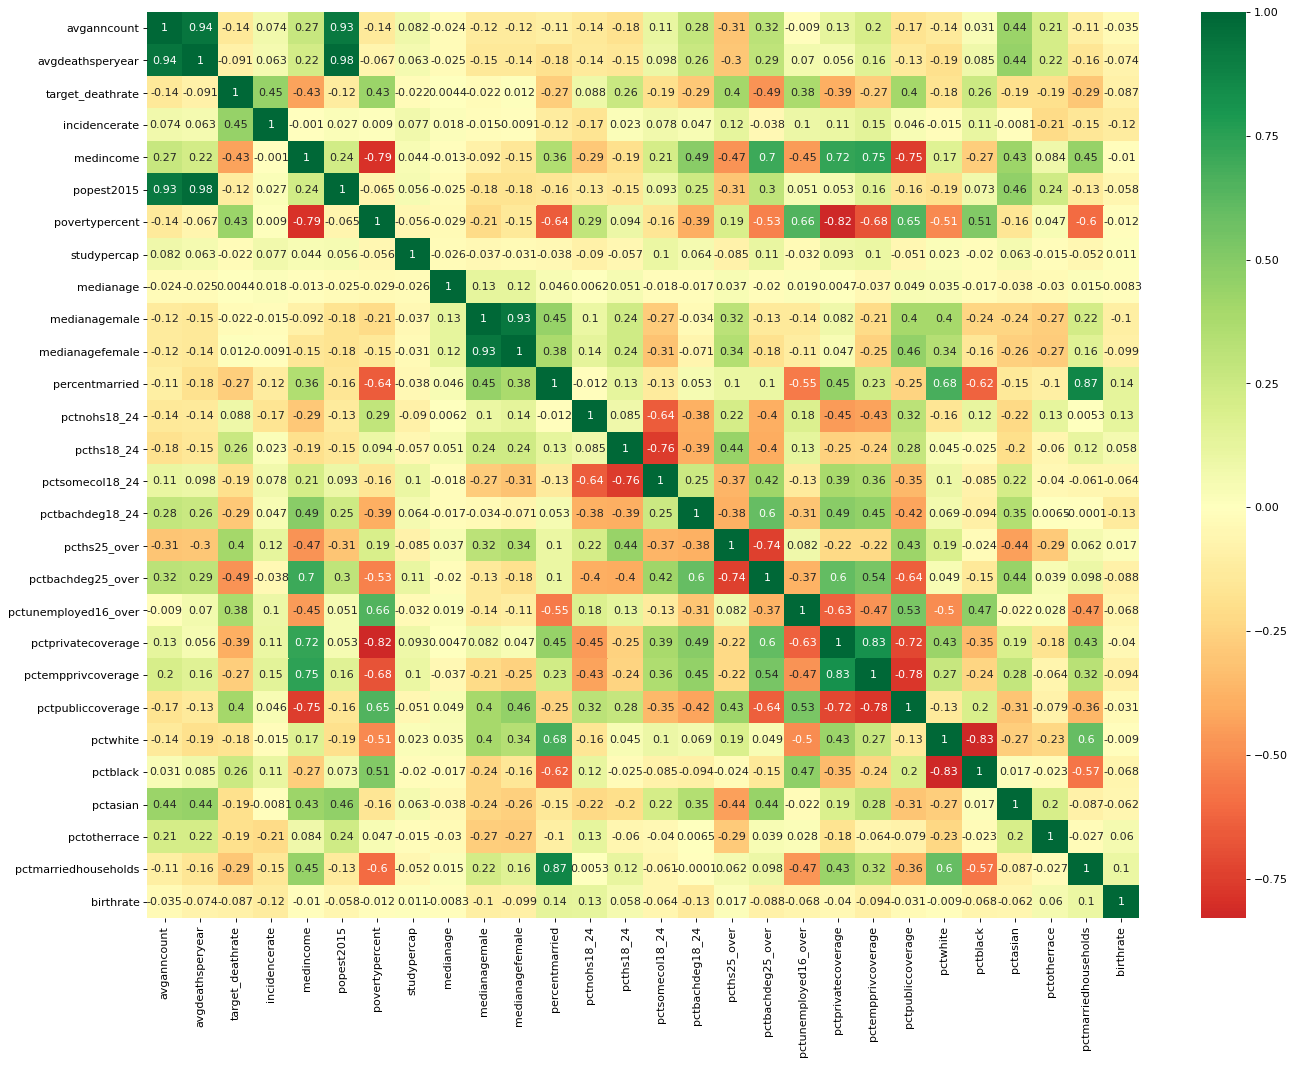

In [36]:
# Correllogram checking correlation
import seaborn as sns
plt.figure(figsize=(20,15), dpi= 80)
sns.heatmap(cancer_death.corr(), xticklabels=cancer_death.corr().columns, yticklabels=cancer_death.corr().columns, cmap='RdYlGn', center=0, annot=True)

array([[<AxesSubplot:title={'center':'avganncount'}>,
        <AxesSubplot:title={'center':'avgdeathsperyear'}>,
        <AxesSubplot:title={'center':'target_deathrate'}>,
        <AxesSubplot:title={'center':'incidencerate'}>,
        <AxesSubplot:title={'center':'medincome'}>],
       [<AxesSubplot:title={'center':'popest2015'}>,
        <AxesSubplot:title={'center':'povertypercent'}>,
        <AxesSubplot:title={'center':'studypercap'}>,
        <AxesSubplot:title={'center':'medianage'}>,
        <AxesSubplot:title={'center':'medianagemale'}>],
       [<AxesSubplot:title={'center':'medianagefemale'}>,
        <AxesSubplot:title={'center':'percentmarried'}>,
        <AxesSubplot:title={'center':'pctnohs18_24'}>,
        <AxesSubplot:title={'center':'pcths18_24'}>,
        <AxesSubplot:title={'center':'pctsomecol18_24'}>],
       [<AxesSubplot:title={'center':'pctbachdeg18_24'}>,
        <AxesSubplot:title={'center':'pcths25_over'}>,
        <AxesSubplot:title={'center':'pctbachdeg25_

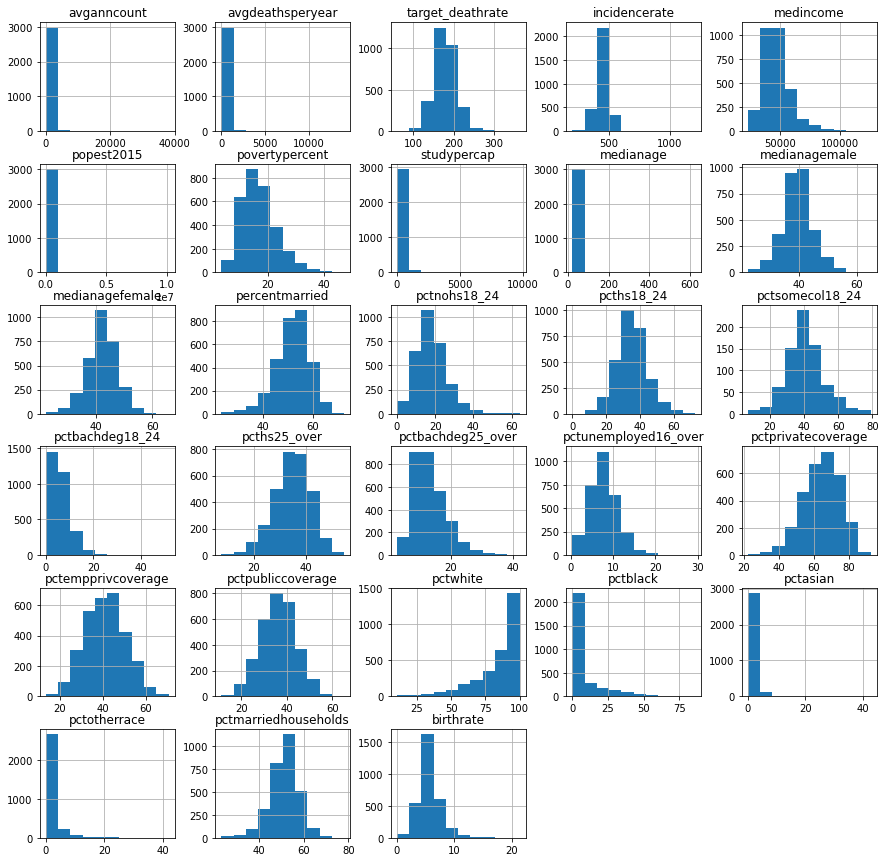

In [29]:
import matplotlib.pyplot as plt
cancer_death.hist(figsize=(15,15))

<AxesSubplot:>

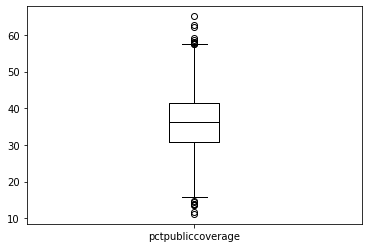

In [38]:
cancer_death.boxplot(column=['pctpubliccoverage'], grid=False, color='black')

<AxesSubplot:xlabel='birthrate', ylabel='pctpubliccoverage'>

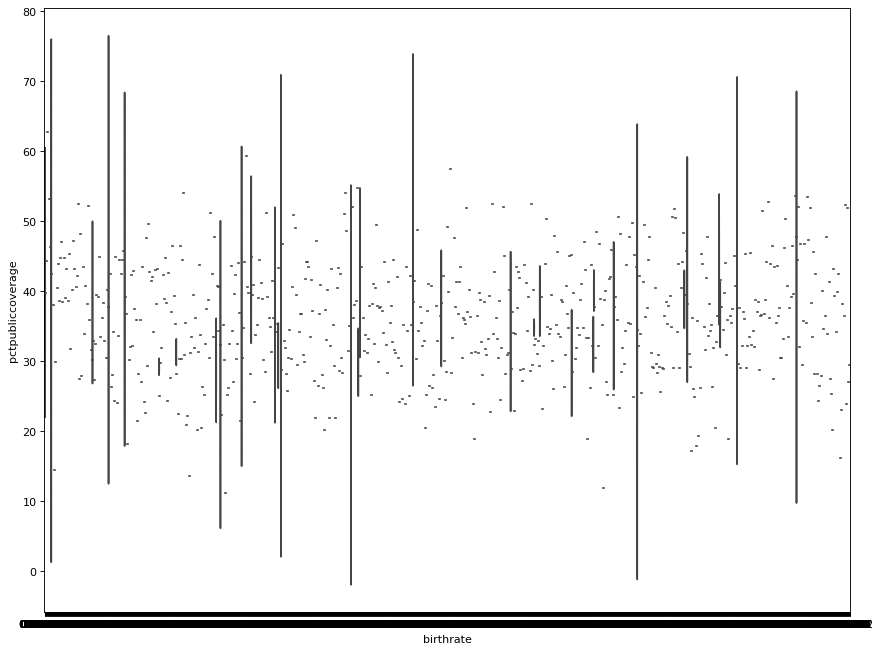

In [41]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='birthrate', y='pctpubliccoverage', data=cancer_death, scale='width', inner='quartile')

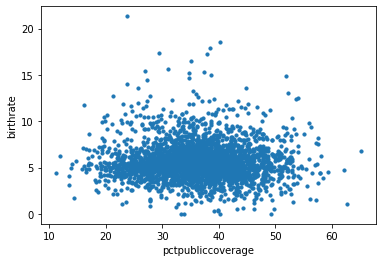

In [19]:
cancer_death.plot.scatter(x = 'pctpubliccoverage', y = 'birthrate', s = 10);

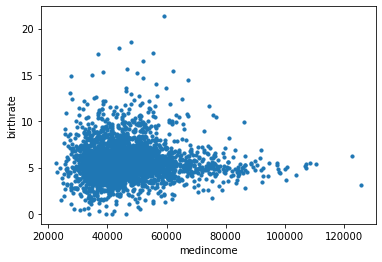

In [24]:
cancer_death.plot.scatter(x = 'medincome', y = 'birthrate', s = 10);

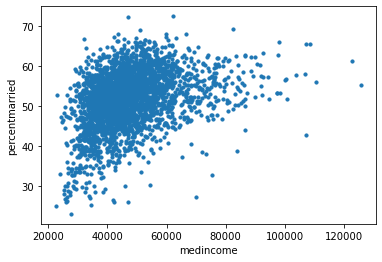

In [25]:
cancer_death.plot.scatter(x = 'medincome', y = 'percentmarried', s = 10);